In [98]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": "bookman",
})


font = {
    'family': 'normal',
    'weight': 'bold',
    'size': 22
}
matplotlib.rc('font', **font)


In [99]:
def setup_grid(ax):
  ax.tick_params(axis='both', which='major', labelsize=80)
  ax.tick_params(axis='both', which='minor', labelsize=60)
  x_major_ticks = np.arange(0, 28, 1)
  x_minor_ticks = np.arange(0, 28, 0.1)
  y_major_ticks = np.arange(0, 18, 1)
  y_minor_ticks = np.arange(0, 18 + 1, 0.1)
  plt.xaxis.set_ticks(x_major_ticks)
  plt.yaxis.set_ticks(y_major_ticks)
  plt.xaxis.set_ticks(x_minor_ticks, minor=True)
  plt.yaxis.set_ticks(y_minor_ticks, minor=True)
  plt.grid(which='major', linewidth=5, c='black')
  plt.grid(which='minor', linestyle='-', c='blue')
  plt.legend('')

In [100]:
def plot(plt, width, data_x, data_y):
    for i in range(len(data_x)):
        plt.plot(data_x.iloc[i], data_y.iloc[i], '-', linewidth = width, label=data_x.index[i], )
        plt.scatter(data_x.iloc[i], data_y.iloc[i])
   

In [101]:
#Data without ring

line1_x = [2, 5, 5.4, 5.4, 4.4]
line2_x = [7, 9.5, 9.8, 9.2, 9.6]
line3_x = [14, 13.8, 13.5, 13.8, 13.5]
line4_x = [18.5, 18.5, 18.6, 18.5, 20]
line5_x = [24, 23.8, 23.3, 23.1, 23.5]

midline_phi = np.arange(3.4, 11.4 + 2, 2)
midline_x = [5.4, 9.8, 13.5, 18.6, 23.3]

all_lines_y = np.arange(2, 18 + 4, 4)
df_x = pd.DataFrame(data = [line1_x, line2_x, line3_x, line4_x, line5_x],
                    index = ['3.40 V', '5.40 V', '7.40 V', '9.40 V', '11.40 V'])
df_y = pd.DataFrame(data = [all_lines_y, all_lines_y, all_lines_y, all_lines_y, all_lines_y],
                    index = ['3.40 V', '5.40 V', '7.40 V', '9.40 V', '11.40 V'])



In [102]:
df_x

,0,1,2,3,4
3.40 V,2.0,5.0,5.4,5.4,4.4
5.40 V,7.0,9.5,9.8,9.2,9.6
7.40 V,14.0,13.8,13.5,13.8,13.5
9.40 V,18.5,18.5,18.6,18.5,20.0
11.40 V,24.0,23.8,23.3,23.1,23.5


In [103]:
df_y

,0,1,2,3,4
3.40 V,2,6,10,14,18
5.40 V,2,6,10,14,18
7.40 V,2,6,10,14,18
9.40 V,2,6,10,14,18
11.40 V,2,6,10,14,18


In [104]:
lr = linregress(midline_x, midline_phi)
slope, intercept = lr.slope, lr.intercept

In [105]:
midline_xring1 = np.array([3.6, 4.8, 5.8, 7, 8.4])
midline_phiring1 = np.array([3.2, 4.2, 5.2, 6.2, 7.2])

midline_xring2 = np.array([21.5, 23.2, 24.8, 26.5])
midline_phiring2 = np.array([9.2, 10.2, 11.2, 12.2])

In [106]:
lring1 = linregress(midline_xring1, midline_phiring1)
slopering1, interceptring1 = lring1.slope, lring1.intercept

lring2 = linregress(midline_xring2, midline_phiring2)
slopering2, interceptring2 = lring2.slope, lring2.intercept

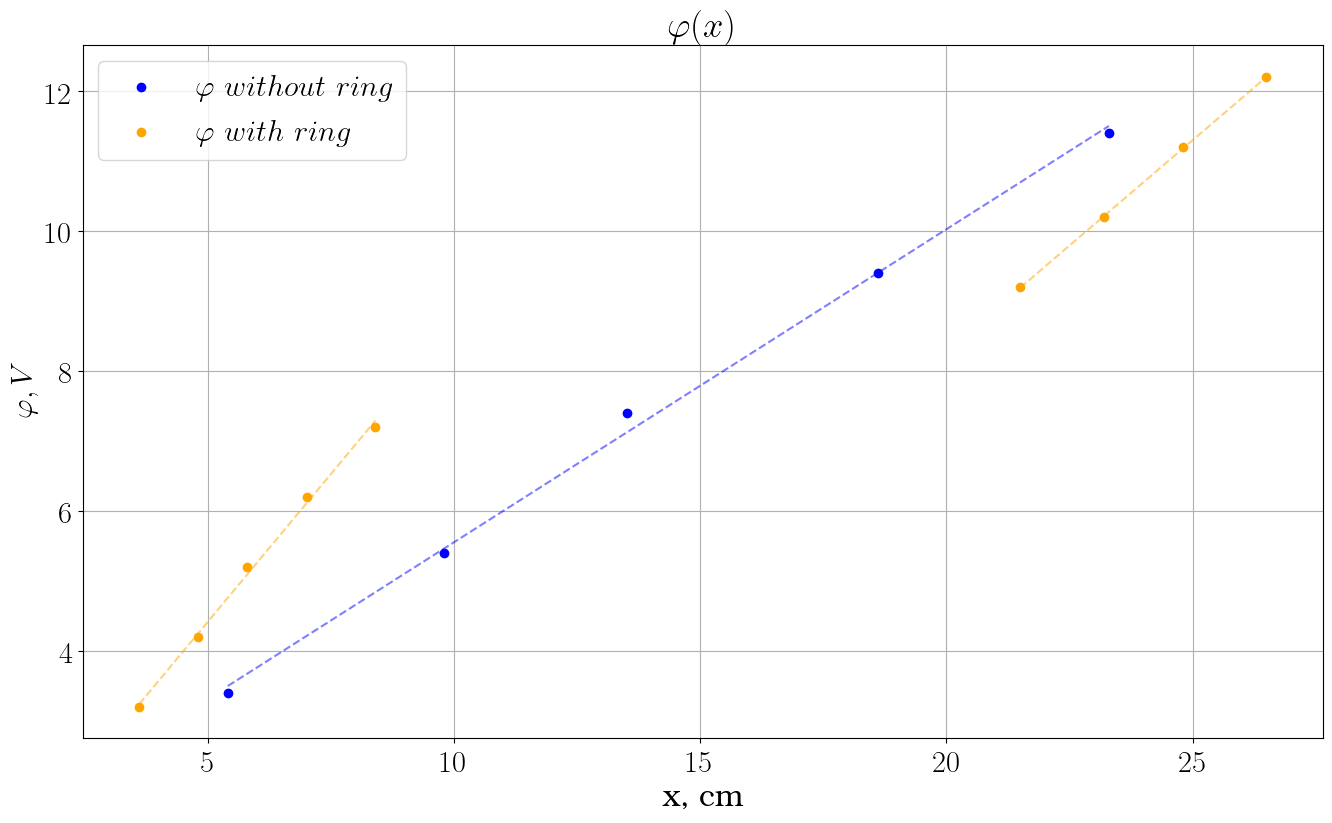

In [107]:
fig = plt.figure(figsize=(16,9))
plt.scatter(midline_x, midline_phi, color="blue", label = r'$\varphi \ without \ ring$')
plt.plot(midline_x, np.array(midline_x) * slope + intercept, color="blue", linestyle="dashed", alpha=.5)

plt.scatter(midline_xring1, midline_phiring1, color="orange", label=r'$\varphi \  with \ ring $')
plt.plot(midline_xring1, np.array(midline_xring1) * slopering1 + interceptring1, color="orange", linestyle="dashed", alpha=.5)

plt.scatter(midline_xring2, midline_phiring2, color="orange")
plt.plot(midline_xring2, np.array(midline_xring2) * slopering2 + interceptring2, color="orange", linestyle="dashed", alpha=.5)


plt.legend()
plt.grid()
plt.xlabel(r'x, cm')
plt.ylabel(r'$\varphi, V$')
plt.title(r'$\varphi(x)$')
plt.savefig('plots/phi(x).png')
plt.show()


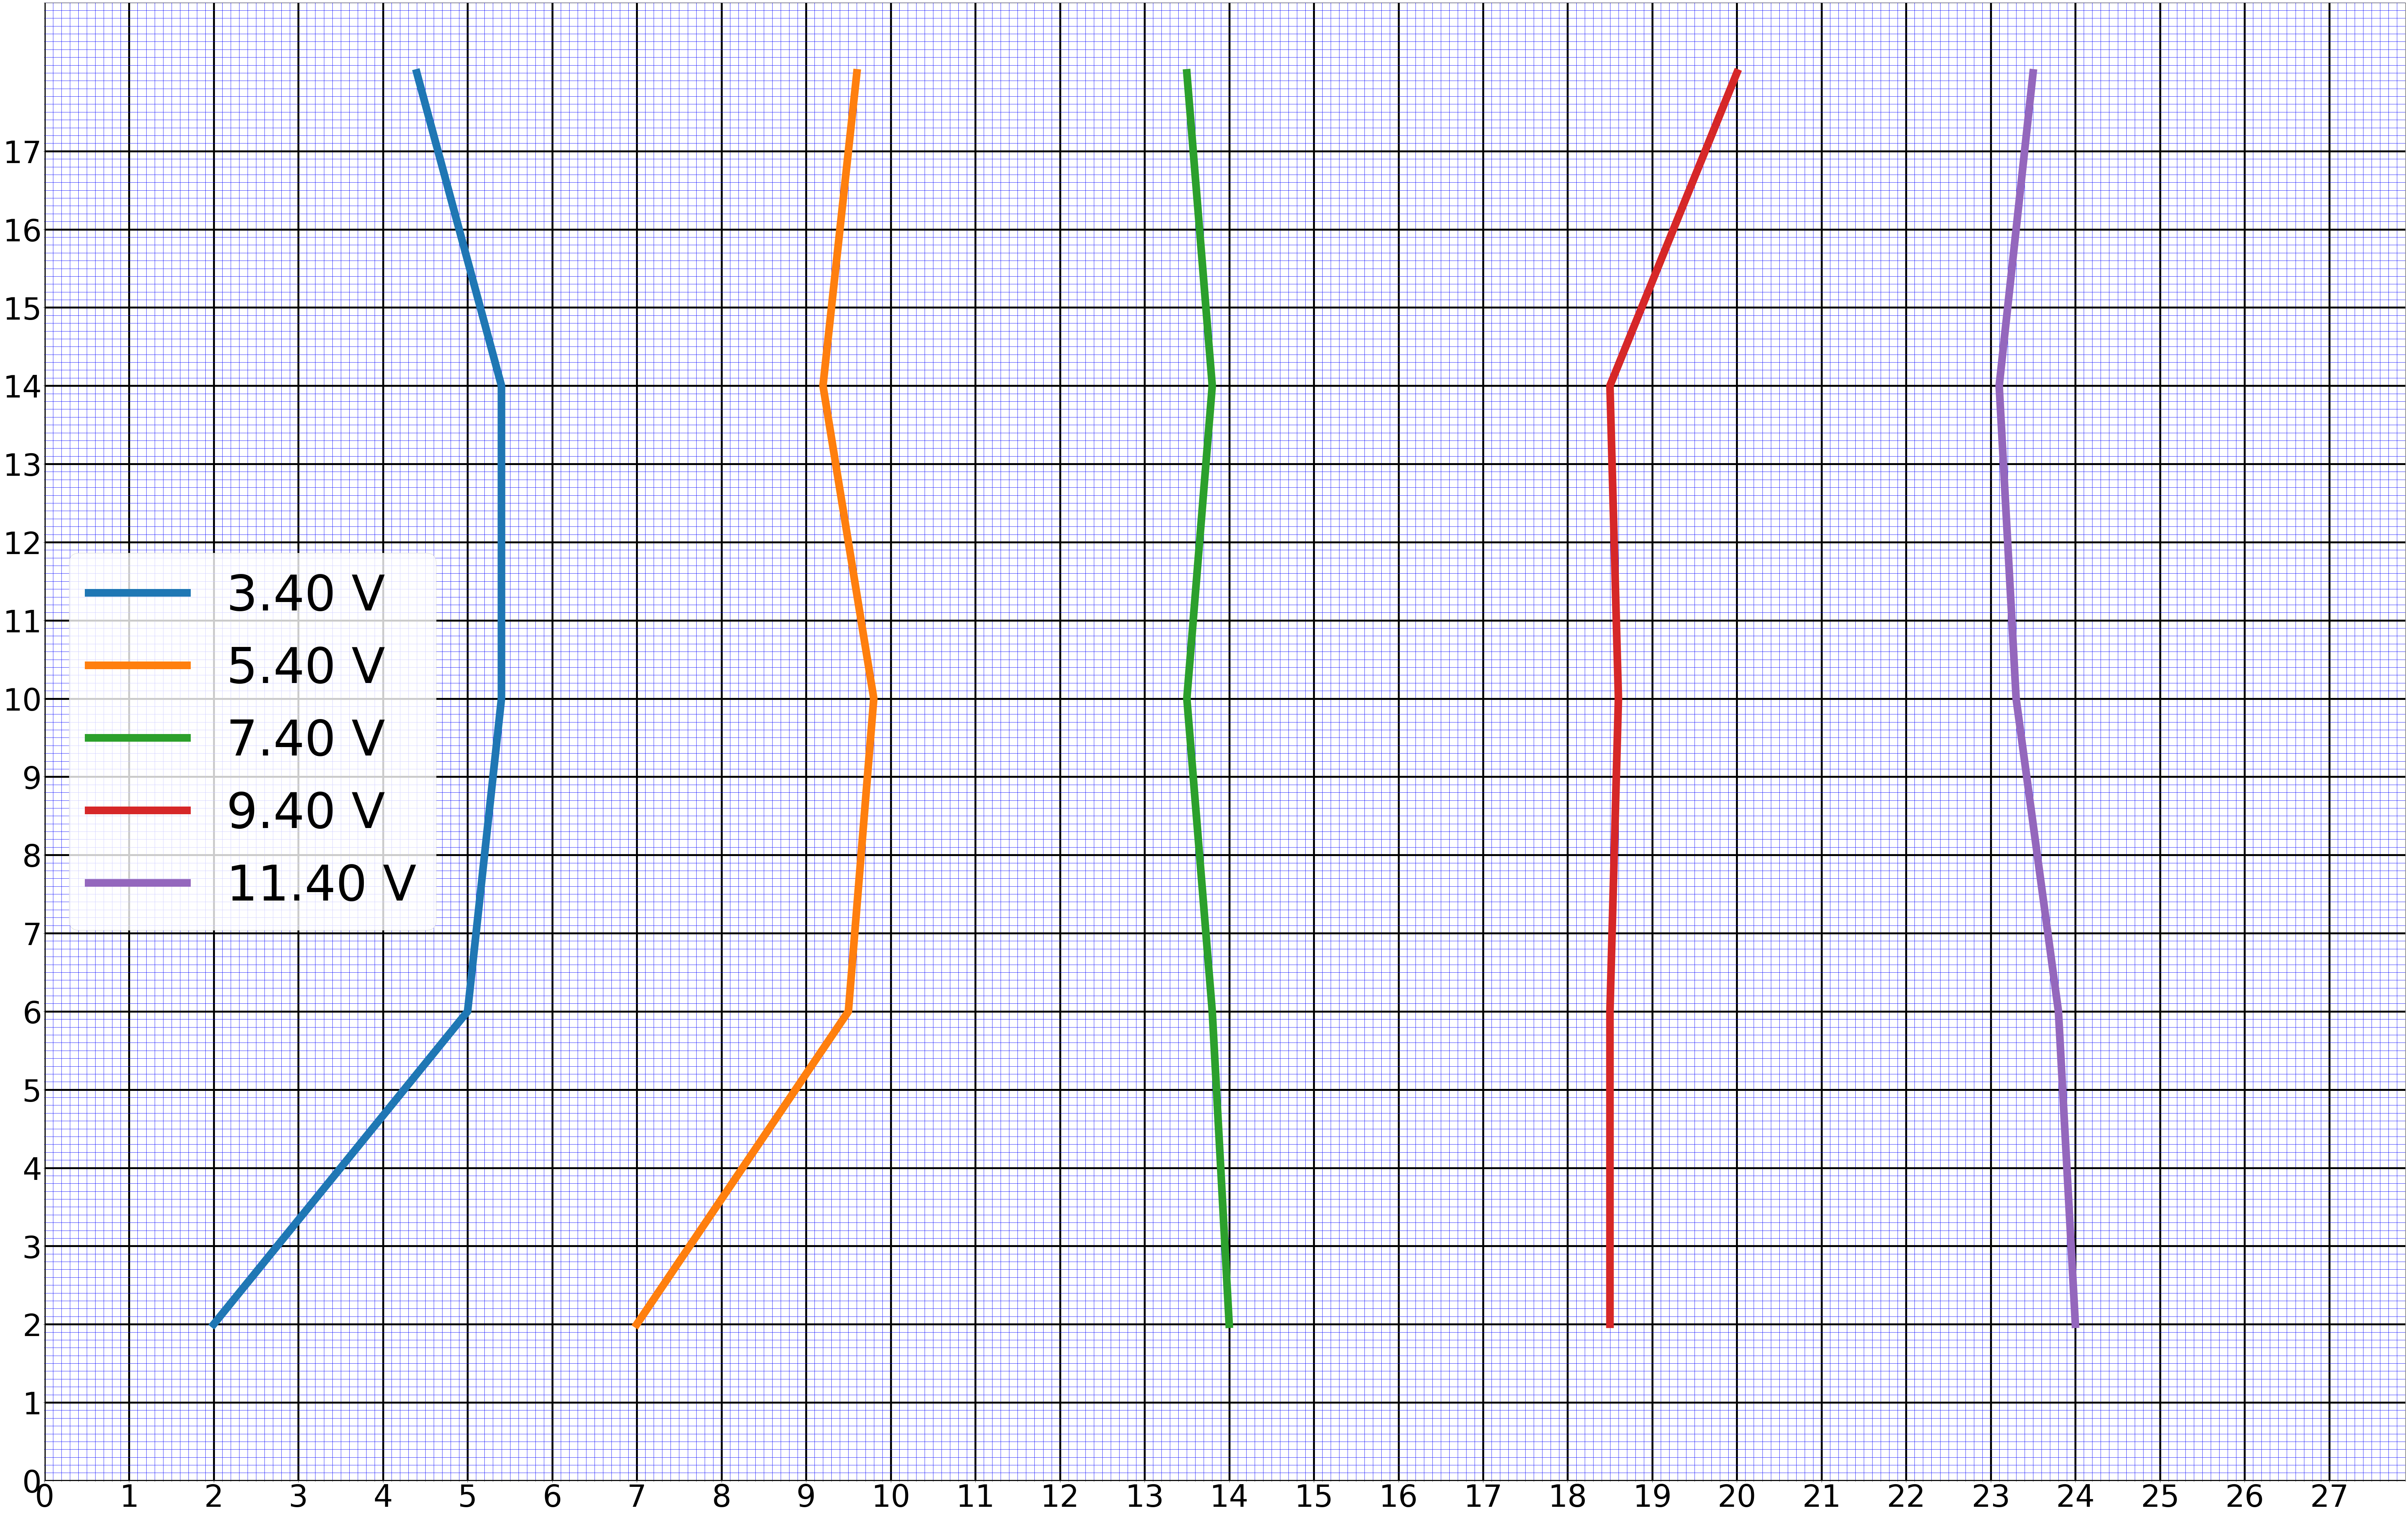

In [37]:
fig = plt.figure(figsize=(28 * cm * 10, 18 * cm * 10))
ax = fig.add_subplot(1, 1, 1)

width=20

plot(ax, width, df_x, df_y)

setup_grid(ax)

plt.legend(fontsize=32 * 4)
plt.show()

In [24]:
#Data with ring

line1_x = [2, 3.1, 3.6, 3.3, 2.8]
line2_x = [4.2, 4.8, 4.8, 4.8, 4.8]
line3_x = [6.5, 6.6, 5.8, 6.2, 6.7]
line4_x = [9, 7.8, 7, 7.8, 9]
line5_x = [11.5, 9.4, 8.4, 9.4, 11.5]
line6_x = [16, 16, 16, 16, 15.8]
line7_x = [19.4, 20.8, 21.5, 20.8, 19.5]
line8_x = [22.2, 23, 23.2, 22.9, 22]
line9_x = [24.8, 24.8, 24.8, 25.8, 24.8]
line10_x = [27.2, 26.8, 26.5, 26.8, 27.2]






all_lines_y = np.arange(2, 18 + 4, 4)
df_x = pd.DataFrame(data = [line1_x, line2_x, line3_x, line4_x, line5_x, line6_x, line7_x, line8_x, line9_x, line10_x],
                    index = ['3.2 V', '4.2 V', '5.2 V', '6.2 V', '7.2 V', '8.2 V', '9.2 V', '10.2 V', '11.2 V', '12.2 V'])
df_y = pd.DataFrame(data = [all_lines_y, all_lines_y, all_lines_y, all_lines_y, all_lines_y, all_lines_y, all_lines_y, all_lines_y, all_lines_y, all_lines_y])


AttributeError: module 'matplotlib.pyplot' has no attribute 'xaxis'

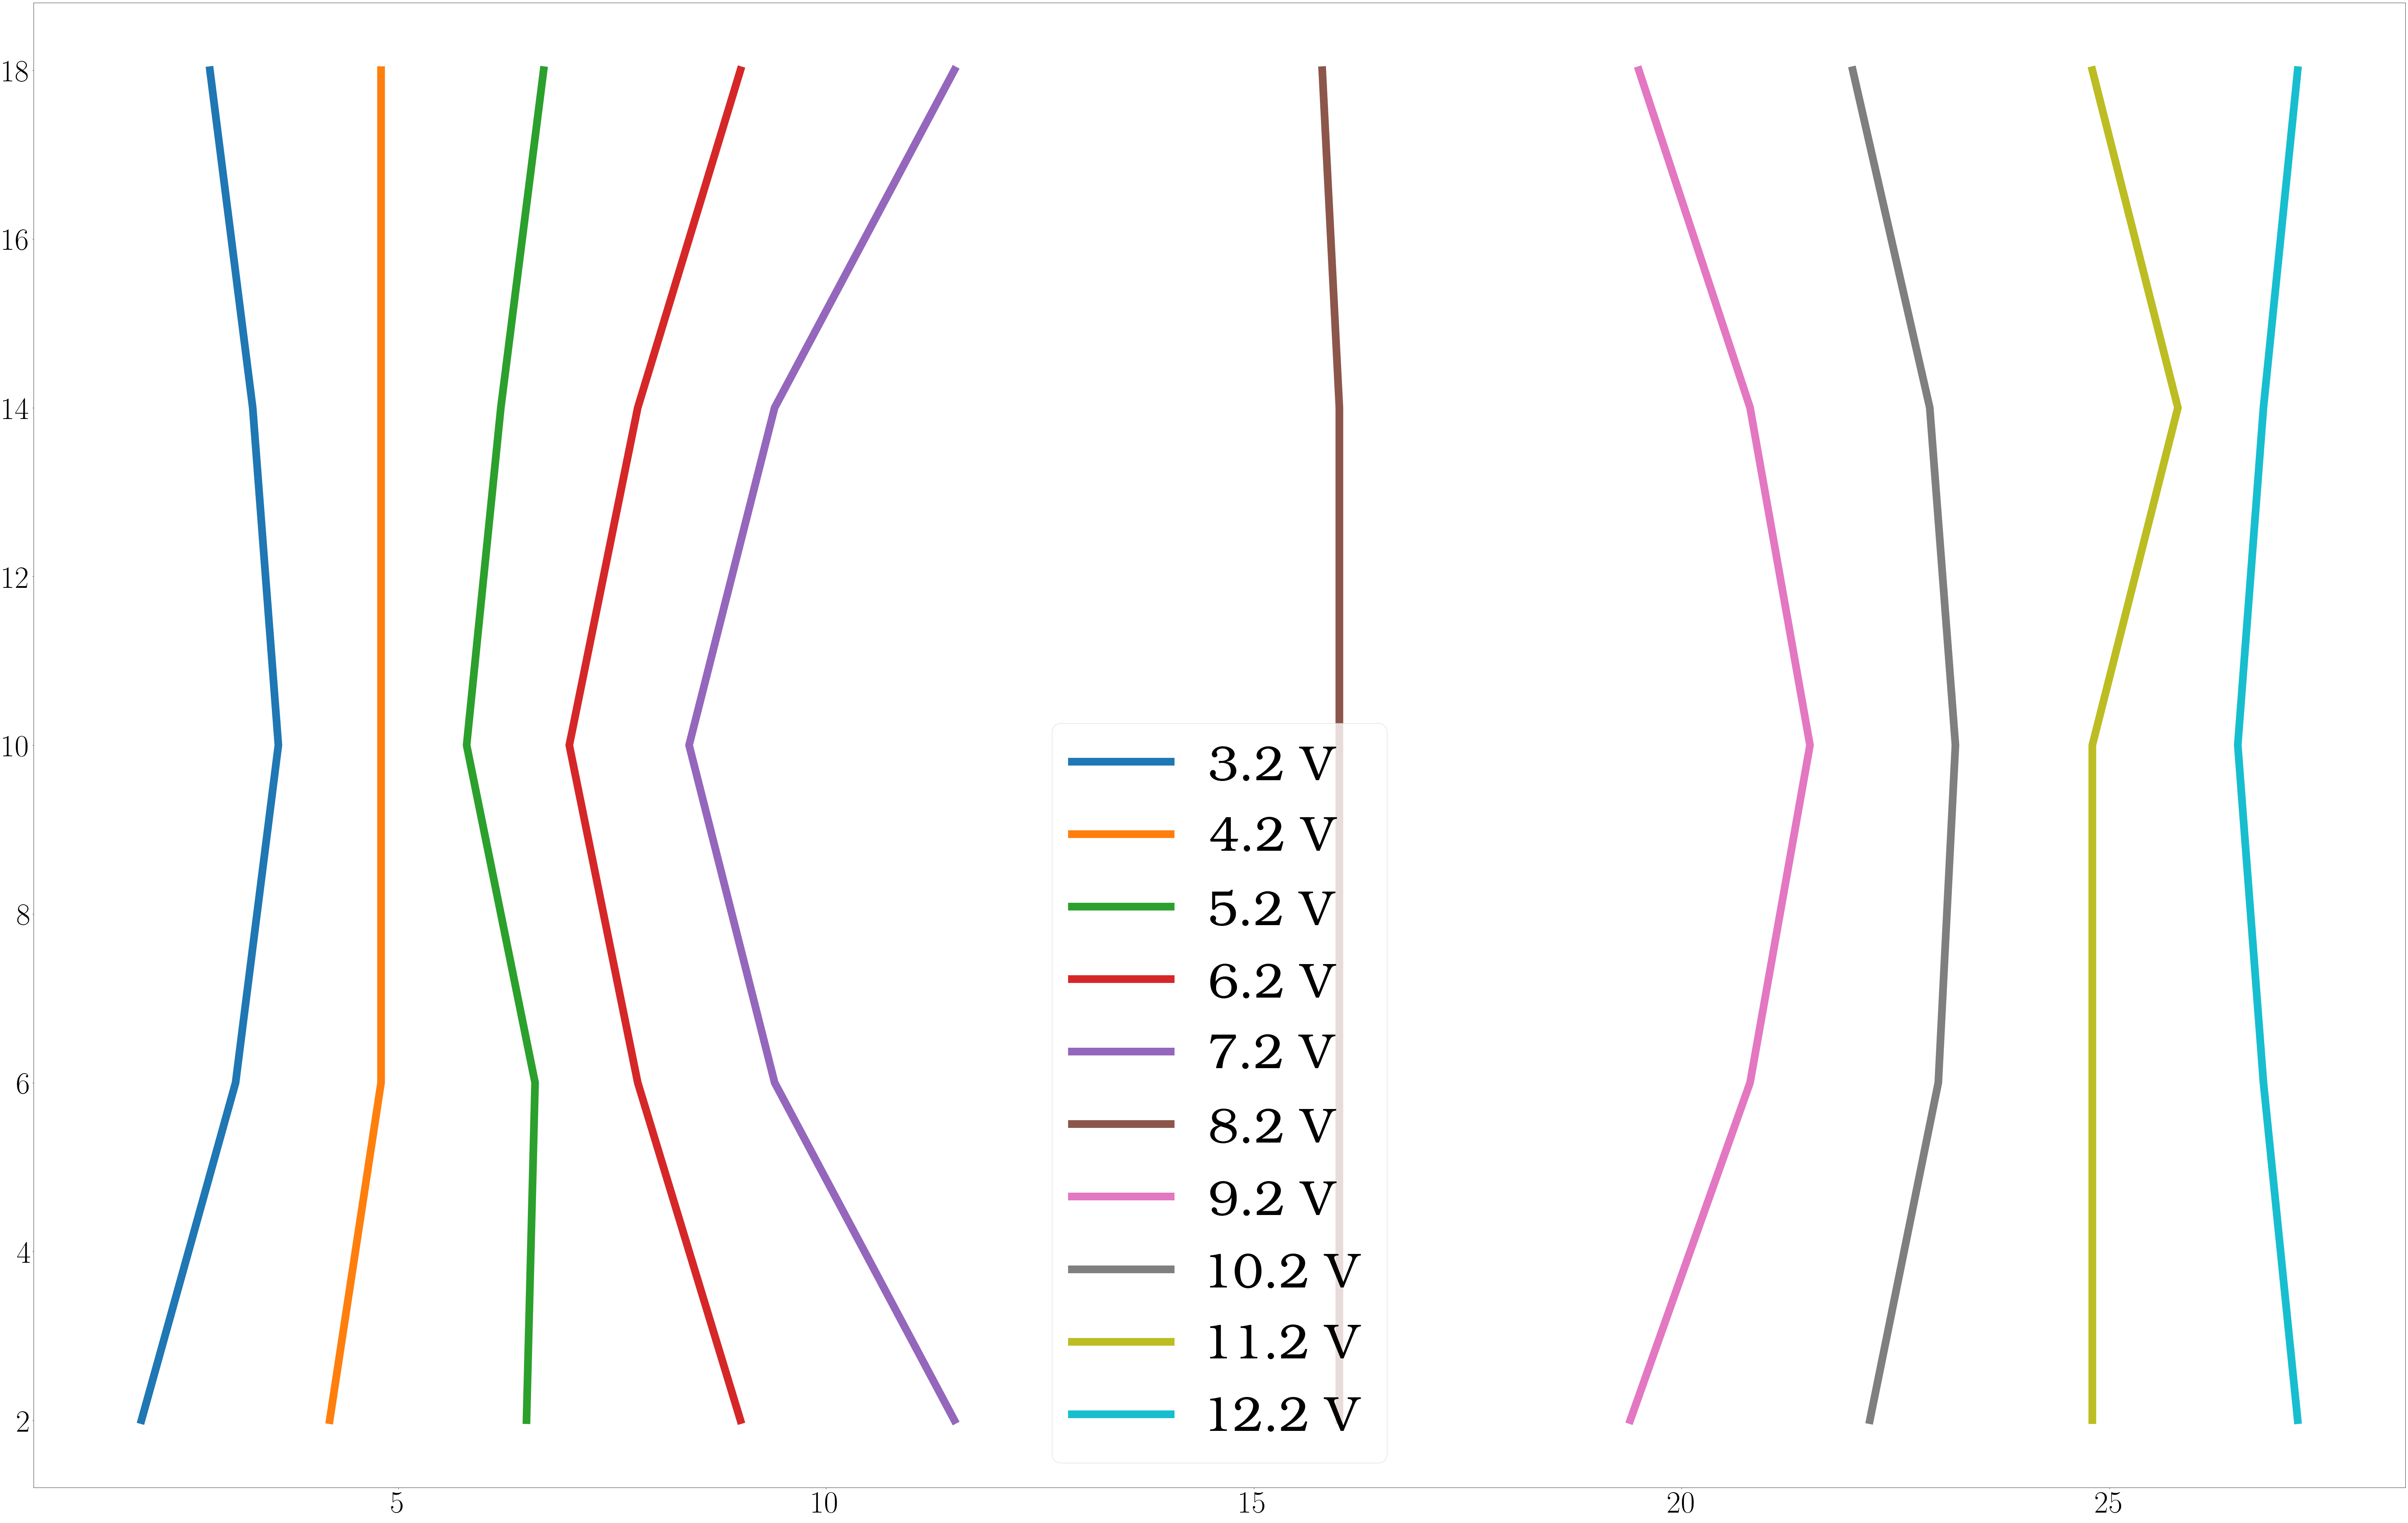

In [25]:
fig = plt.figure(figsize=(28 * cm * 10, 18 * cm * 10))
ax = fig.add_subplot(1, 1, 1)

width=20
size=10

plot(ax, width, df_x, df_y)
plt.legend(fontsize=32 * 4)


setup_grid(ax)
plt.show()